In [2]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import os
import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'
%run 'extract_FOV.ipynb'

In [4]:
%run 'make_mockobs.ipynb'

### CASTOR Science Maturation Study Specs

Filter Bandpass:
- UV: 150 - 300 nm <br> OR
- UV-dark: 135 - 260 nm

FOV:
0.44 deg x 0.56 deg

FWHM:
0.15 arcsec

Lowest redshift where could observe Ly-alpha emission:  z = v/c = delta lambda/lambda

In [26]:
# Redshifts at either end of the bandpasses:
print((150-121.6)/121.6)
print((160-121.6)/121.6)
print((300-121.6)/121.6)

print((135-121.6)/121.6)
print((260-121.6)/121.6)

# spurred from later on:
print((1.47-0.23)/25)

0.23355263157894743
0.31578947368421056
1.467105263157895
0.11019736842105268
1.1381578947368423
0.0496


### Cosmology calculator (https://www.astro.ucla.edu/~wright/CosmoCalc.html)

Redshift of 0.23: D =  940 Mpc, 3.704 kpc/" <br>
Redshift of 1.47: D = 4380 Mpc, 8.594 kpc/"

Redshift of 0.11: D =  460 Mpc, 2.019 kpc/" <br>
Redshift of 1.14: D = 3685 Mpc, 8.348 kpc/"

Redshift of 0.32: D = 1279 Mpc, 4.697 kpc/"

In [27]:
# cosmological distance enclosed in the bandpass:

print(4380-940)
print(1279-940)

print(3685-460)

3440
339
3225


With a cosmological distance range of ~3300 Mpc, that means stacking the EAGLE 100Mpc simulation 33 times. Do this to estimate the crowding effect.

In [28]:
# 32000 pixels per side in the raw simulation that is 100 cMpc 
# 100000 ckpc/32000pix / (N kpc / ") * (1+z)

print(f'{100000/32000 / (3.704) * (1+0.23):.3f} arcsec/pix')
print(f'{100000/32000 / (8.594) * (1+1.47):.3f} arcsec/pix')
print(f'{100000/32000 / (4.697) * (1+0.32):.3f} arcsec/pix')

print(f'{100000/32000 / (2.019) * (1+0.11):.3f} arcsec/pix')
print(f'{100000/32000 / (8.348) * (1+1.14):.3f} arcsec/pix')

1.038 arcsec/pix
0.898 arcsec/pix
0.878 arcsec/pix
1.718 arcsec/pix
0.801 arcsec/pix


Don't need to reduce the resolution of the simulation at all since pixel size is always above instrument resolution of 0.15 ".

Now what are the FOV sizes since looking out through a cosmological volume? Should be difference at either end of the bandpass.

In [29]:
# (3.704 kpc/arcsec) * (1+0.23) * 0.44 deg * (60 arcmin/deg *60 arcsec/arcmin) = XXX kpc
print(f'{(3.704) * (1+0.23) * 0.44 * (60*60) / 1000:.3f} Mpc')
print(f'{(8.594) * (1+1.47) * 0.44 * (60*60) / 1000:.3f} Mpc\n')

print(f'{(2.019) * (1+0.11) * 0.44 * (60*60) / 1000:.3f} Mpc')
print(f'{(8.348) * (1+1.14) * 0.44 * (60*60) / 1000:.3f} Mpc\n')

print(f'{(4.697) * (1+0.32) * 0.44 * (60*60) / 1000:.3f} Mpc')


7.217 Mpc
33.624 Mpc

3.550 Mpc
28.298 Mpc

9.821 Mpc


In [24]:
print(33.6-7.2)

print(28.3-3.6)

# split the slices up into at least ~25 chunks and get those redshifts --> should help with determining the positioning of the filaments correctly.
# at some point, it should just become a noisy Ly-alpha background and the individual filaments won't be resolved
# what is that point? Good reference...


26.400000000000002
24.7


In [22]:
machine='chinook'

distance = '980Mpc'; resolution = None; slicewidth = 20

data_tuple_20 = loaddata(machine=machine,resolution=resolution,distance=distance,slicewidth=slicewidth,DragonflyTelescope=False)


Resolution is None, finding minimum resolution of the similuation...
The resolution of the raw simulation at 980Mpc is 0.6588656968163609.
Loading data of slicewidth 20 (after rounding), number of slices is 4
./intermediatedata/data_980Mpc_1arcsec_20slwd.npz exists, loading now...
./intermediatedata/data_980Mpc_1arcsec_20slwd.npz was not saved as a tuple since too large, returning as tuple with 32000,1,0.6588656968163609 appended.


In [4]:
data_tuple_20[0].shape

(32000, 32000)

In [5]:
resolution = 0.6 # arcsec
print 0.5*60*60
data_FOV, xystarts, size = extractFOV(data_tuple_20,resolution,distance,x_center=50.5,y_center=13.5,\
                                      x_angFOV=1800.,y_angFOV=1800.)

1800.0


In [6]:
%run 'mask_galaxies.ipynb'  ## import this because has nice imreduce function in it

The type of size is <type 'list'>
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2724.0,2724.0.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2724.0,2724.0.
Taking the average along different axes
The type of size is <type 'list'>
(227, 227)


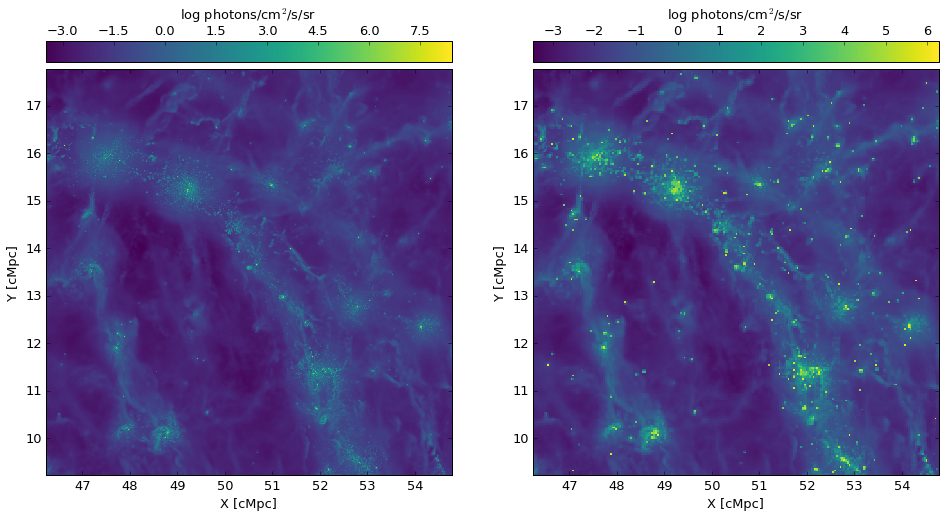

In [16]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV, size, ax1,xystarts = xystarts)

factor = 12.
#lowres = get_halpha_SB.imreduce(data_FOV, factor, log=True, method = 'average') 
lowres, mask_none, fillvalue_none = imreduce_masked(data_FOV, factor, log=True, masking=False) 
get_halpha_SB.makemap(lowres, size, ax2,xystarts = xystarts)

print lowres.shape

The type of size is <type 'list'>
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2712.0,2712.0.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2712.0,2712.0.
Taking the average along different axes
The type of size is <type 'list'>
(113, 113)
the mask:
[[False  True  True ..., False False False]
 [False  True  True ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
saving as imreduce_mask.npz...
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2712.0,2712.0.
Before reducing resolution, 

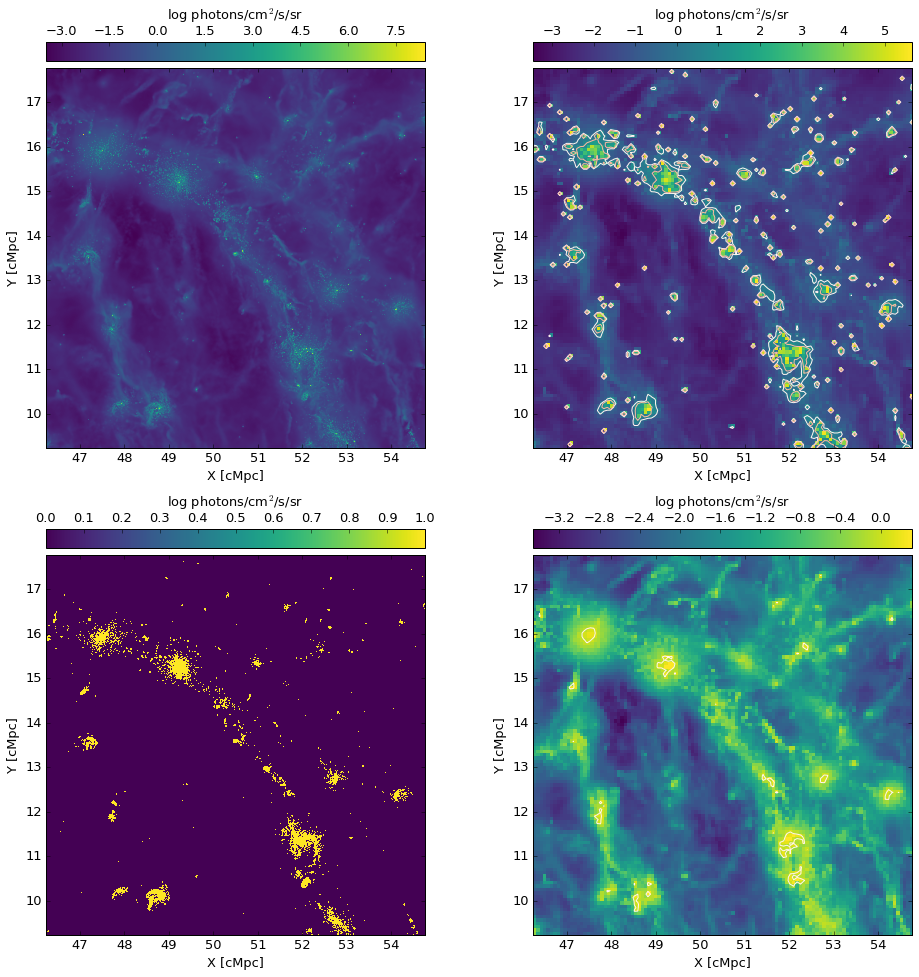

In [40]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV, size, ax1,xystarts = xystarts)

factor = 24.
#lowres = get_halpha_SB.imreduce(data_FOV, factor, log=True, method = 'average') 
lowres2, mask_none, fillvalue_none = imreduce_masked(data_FOV, factor, log=True, masking=False) 
get_halpha_SB.makemap(lowres2, size, ax2,xystarts = xystarts)
print lowres2.shape
levels = np.array([-2,-1,0])#,1])#,2,3])
levels = np.array([0,1])#,1,2])
colours = ('red','orange','yellow','cyan','purple','pink')
plasmas = plt.get_cmap("Reds")
colours = (plasmas(0),plasmas(0.25))#,plasmas(0.5))#,plasmas(0.75))
ax2.contour(lowres2.T,levels,colors=colours,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]))

lowres3, mask_none, fillvalue_none = imreduce_masked(data_FOV, factor, log=True, masking=True) 
inmask = np.load('imreduce_mask.npz')['arr_0']
get_halpha_SB.makemap(inmask, size, ax3,xystarts = xystarts)

get_halpha_SB.makemap(lowres3, size, ax4,xystarts = xystarts)
print lowres3.shape
levels = np.array([-2,-1,0])#,1])#,2,3])
levels = np.array([0,1])#,1,2])
colours = ('red','orange','yellow','cyan','purple','pink')
plasmas = plt.get_cmap("Reds")
colours = (plasmas(0),plasmas(0.25))#,plasmas(0.5))#,plasmas(0.75))
ax4.contour(lowres3.T,levels,colors=colours,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]))

The type of size is <type 'list'>
Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2712.0,2712.0.
Before reducing resolution, the original array was trimmed from size 2732,2732 to size 2712.0,2712.0.
Taking the average along different axes
The type of size is <type 'list'>
(113, 113)
The type of size is <type 'list'>


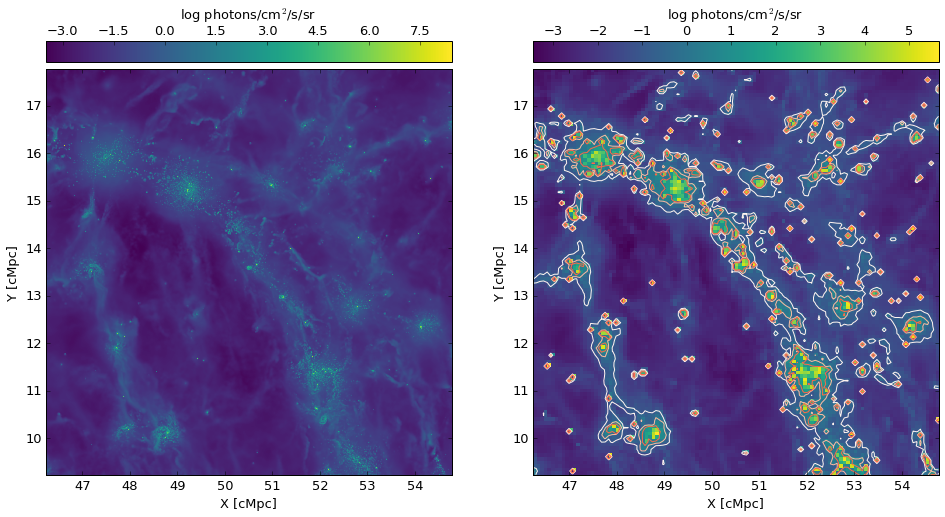

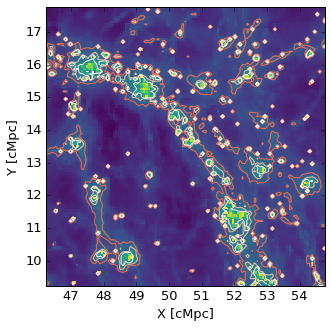

In [50]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(data_FOV, size, ax1,xystarts = xystarts)

factor = 24.
#lowres = get_halpha_SB.imreduce(data_FOV, factor, log=True, method = 'average') 
lowres2, mask_none, fillvalue_none = imreduce_masked(data_FOV, factor, log=True, masking=False) 
get_halpha_SB.makemap(lowres2, size, ax2,xystarts = xystarts)
print lowres2.shape

levels = np.array([-1,0,1])
plasmas = plt.get_cmap("Reds")
colours = (plasmas(0),plasmas(0.25),plasmas(0.5))#,plasmas(0.75))
ax2.contour(lowres2.T,levels,colors=colours,extent=(xystarts[0],xystarts[0]+size[0],xystarts[1],xystarts[1]+size[1]))

Will set mask to False since masking is set to False.
Output grid must have a integer number of cells: trimming the array down to satisfy this.
Before reducing resolution, the original array was trimmed from size 1518,1518 to size 1512.0,1512.0.
Before reducing resolution, the original array was trimmed from size 1518,1518 to size 1512.0,1512.0.
Taking the average along different axes
The type of size is <type 'list'>


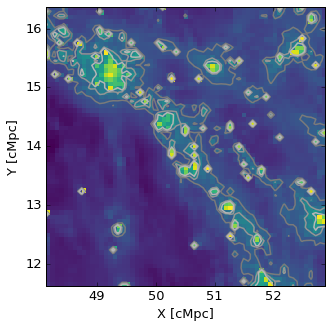

In [81]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5))

data_FOV_small,xystarts_small,size_small = extractFOV(data_tuple_20,resolution,distance,\
                                       x_center=50.5,y_center=14.0,\
                                       x_angFOV=1000.,y_angFOV=1000.)
factor = 24.
lowres_small, mask_none, fillvalue_none = imreduce_masked(data_FOV_small,factor,log=True,masking=False) 

get_halpha_SB.makemap(lowres_small,size_small,ax1,xystarts=xystarts_small,colorbar=False)
levels = np.array([-1,0,1])
plasmas = plt.get_cmap("Reds")
plasmas = plt.get_cmap("Greys")
colours = (plasmas(0.6),plasmas(0.5),plasmas(0.4))#,plasmas(0.75))
#colours = (plasmas(0.5),plasmas(0.5),plasmas(0.5))#,plasmas(0.75))
linestyles = ['-','--','-.']
#rcParams["lines.linewidth"]
from matplotlib import rcParams
rcParams.update({"lines.linewidth": 1.5})

ax1.contour(lowres_small.T,levels,colors=colours,
            extent=(xystarts_small[0],xystarts_small[0]+size_small[0],
                    xystarts_small[1],xystarts_small[1]+size_small[1]))

plt.savefig('extract_FOV_CASTOR_withcontours.pdf')

In [12]:
data_FOV+1 # since in log10 space, this is equivalent to multiplying by 10

array([[ 1.15924859,  1.42160726,  1.65519786, ..., -1.95308161,
        -1.94928956, -1.94192863],
       [ 1.02119386,  1.26505399,  1.4110322 , ..., -1.94142461,
        -1.93686318, -1.92870569],
       [ 0.83511984,  1.07744682,  1.21010327, ..., -1.92698264,
        -1.92122912, -1.91194725],
       ..., 
       [-0.54234004, -0.5448029 , -0.5487659 , ..., -1.16068006,
        -1.15473342, -1.14819145],
       [-0.56379616, -0.56630242, -0.57013452, ..., -1.16375113,
        -1.15760398, -1.15075994],
       [-0.58271098, -0.58496523, -0.58869946, ..., -1.1660254 ,
        -1.15973186, -1.15265727]], dtype=float32)

******* Adding noise to the input data to simulate a mock observation by the 48.0 lens Dragonfly Telescope *******
DEBUGGING: the binpix_size (resolution) is 0.6
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using new CMOS cameras... (QE = 0.70, R = 2.)

Inputting CASTOR values

area_lens=7853.98163397,pix_size=0.5,tau_l=0.85,tau_f=1.0,D=0.04,R=2.0,QE=0.7

DEBUGGING: R is : 2.0
DEBUGGING: the number of pixels per bin is 1.0
DEBUGGING: raise the data by 10** since was logged data before...
DEBUGGING: the total object signal [electrons] detected ranges from: 0.00313918 to 2.60567e+09
The width of the filter that the data was taken with is None nm. 
Sky background is zero.
Adding sky background noise and shot noise...
DEBUGGING: the background in the bandwidth is: 0.0 photon/s/arcsec^2/m^2
DEBUGGING: the background signal, B_sky, is: 0.0 electron/s/pixel
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 0.0
DEBUGGING: the total background noisy signal [elect

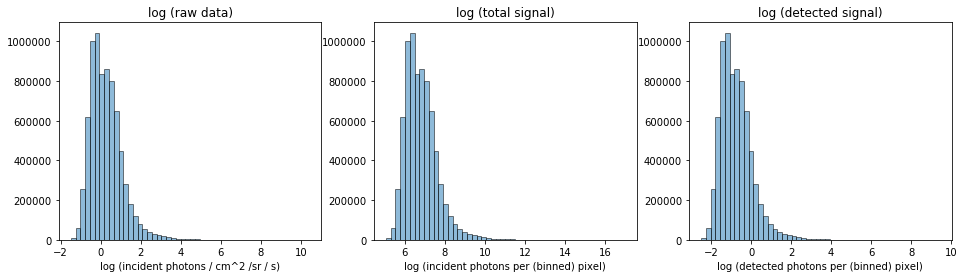

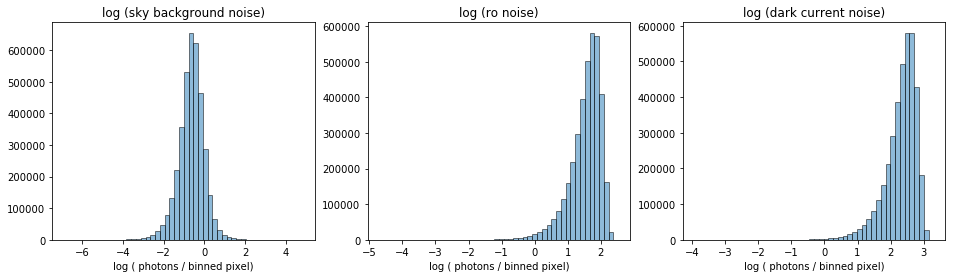

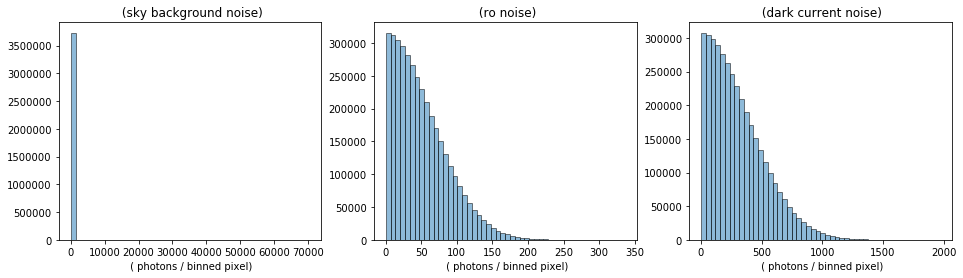

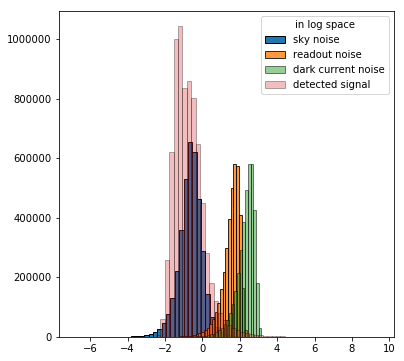

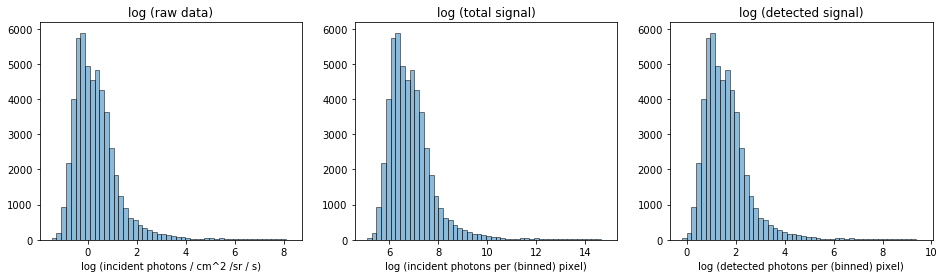

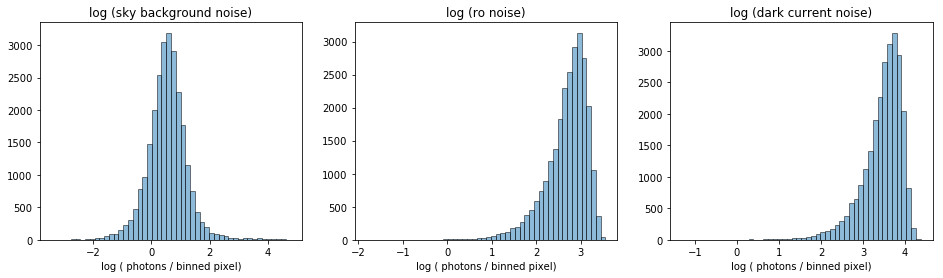

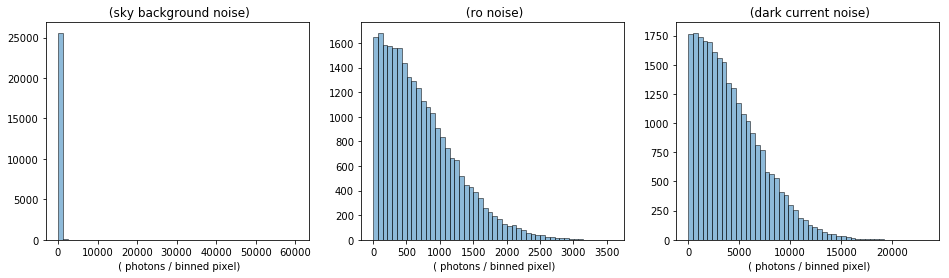

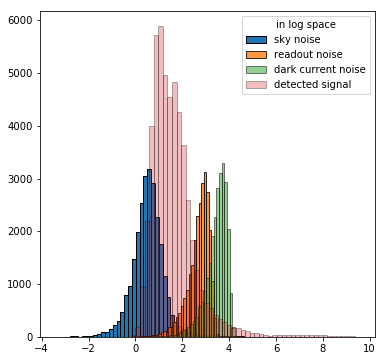

In [57]:
noiseadded_signal,B_sky_array,R_array,D_array = addnoise(data_FOV+2.,resolution,exptime = 1000.*60.*60.,plotchecks=True,\
                                                         filterwidth=None,CMOS=True,R=None,debugging=True,CASTOR=True)


noiseadded_signal_lowres,B_sky_array_lowres,R_array_lowres,D_array_lowres = addnoise(lowres+2.,resolution*factor,exptime = 1000.*60.*60.,plotchecks=True,\
                                                         filterwidth=None,CMOS=True,R=None,debugging=True,CASTOR=True)


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


The type of size is <type 'list'>


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log10


The type of size is <type 'list'>


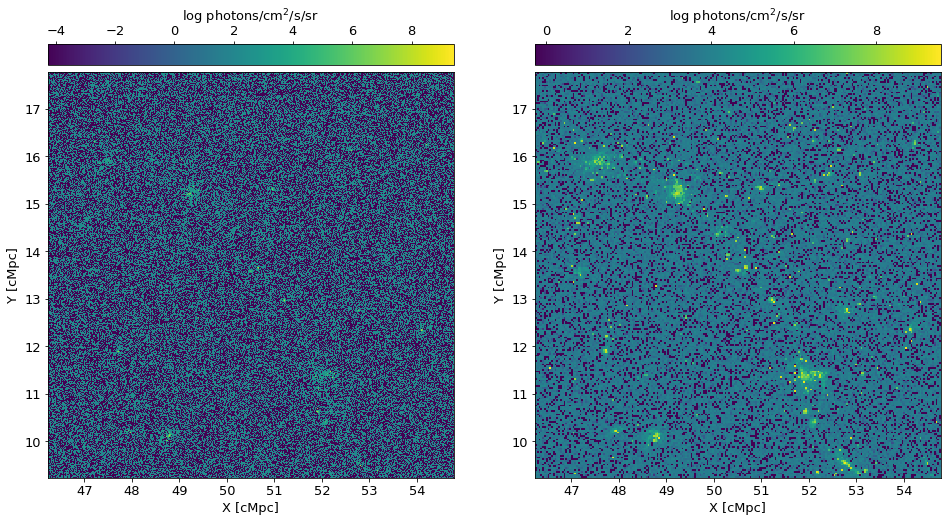

In [63]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 16))
get_halpha_SB.makemap(np.log10(noiseadded_signal), size, ax1,xystarts = xystarts)

get_halpha_SB.makemap(np.log10(noiseadded_signal_lowres+0.0001*np.std(noiseadded_signal_lowres)), size, ax2,xystarts = xystarts)


In [45]:
print len(noiseadded_signal_lowres[noiseadded_signal_lowres<0])
print len(noiseadded_signal_lowres[noiseadded_signal_lowres>0])
np.std(noiseadded_signal_lowres)

57234
59047


3758116.7067379397